In [21]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [22]:
filename = "features.csv"
filepath = os.path.join("..","data",filename)

In [23]:
data = pd.read_csv(filepath,index_col=False, header=0)

In [24]:
series = pd.Series.from_csv(filepath, header=0)
#series = pd.read_csv(filepath, header=0)

len(series)

/Users/manuelamachado/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


327

In [25]:
data.head()

,Unnamed: 0,Value,year,Price,REDTI,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,3.132,1990,7.17,8.8,1,0,0,0,0,0,0,0,0,0,0,0
1,1,3.395,1990,7.48,22.7,0,1,0,0,0,0,0,0,0,0,0,0
2,2,4.685,1990,7.57,29.8,0,0,1,0,0,0,0,0,0,0,0,0
3,3,5.160,1990,7.69,26.8,0,0,0,1,0,0,0,0,0,0,0,0
4,4,5.863,1990,7.96,53.9,0,0,0,0,1,0,0,0,0,0,0,0


In [26]:
X = data[["Price", "year", "REDTI", "month_1", "month_2", "month_3", "month_4", "month_5", "month_6", "month_7", "month_8", "month_9", "month_10", "month_11", "month_12" ]]
y = data["Value"].values.reshape(-1, 1)
print(X.shape, y.shape)

(327, 15) (327, 1)


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Price,year,REDTI,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
221,11.77,2008,78.6,0,0,0,0,0,1,0,0,0,0,0,0
148,8.64,2002,53.5,0,0,0,0,1,0,0,0,0,0,0,0
158,8.35,2003,40.5,0,0,1,0,0,0,0,0,0,0,0,0
225,11.81,2008,39.3,0,0,0,0,0,0,0,0,0,1,0,0
316,13.01,2017,27.5,0,0,0,0,1,0,0,0,0,0,0,0


In [29]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [30]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [37]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Price"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Price"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

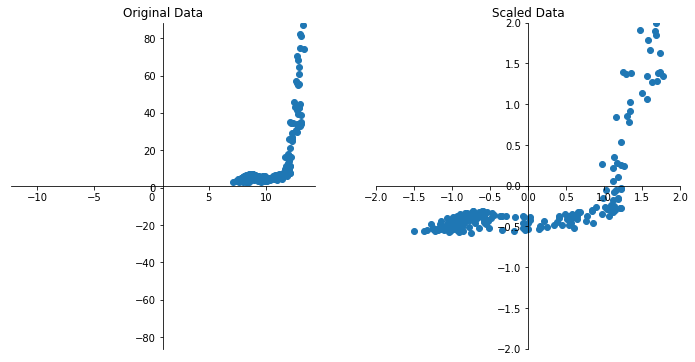

In [38]:
plt.show()

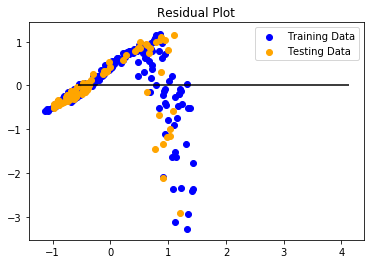

In [39]:
 # Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [40]:
 from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4765203375340047, R2: 0.4179427227044178
